# 1.この課題の目的
- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.住宅価格の回帰
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト
分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# 3.データセットの準備
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

# 4.回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明はしません。

## 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、**GrLivArea**と**YearBuilt**の2つだけを利用することにします。



# 【課題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
# pandas numpy matplotlib.pyplotライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# train.csvをデータフレーム形式で読み込んで表示
df = pd.read_csv('train.csv') 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# GrLivAreaとYearBuilt の列のみ抽出
GrLivArea_YearBuilt = df.loc[: , ['GrLivArea', 'YearBuilt']]
GrLivArea_YearBuilt.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


# 【課題2】回帰問題のパイプライン
データを簡単に分析、前処理し、 **線形回帰** による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。

[sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。



## 欠損値の有無を確認→欠損値がない為、データの正規化のみを前処理とする

In [3]:
# isnullメソッドにて欠損値があるかを確認
GrLivArea_YearBuilt.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

## データの分割

In [4]:
# 特徴量をnumpy配列に変換
np_x = np.array(GrLivArea_YearBuilt)
np_x

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]], dtype=int64)

In [5]:
np_x.shape

(1460, 2)

In [6]:
# 目的変数列SalePrice列をnumpy配列に変換し、reshapeメソッドで1460行１列に変換
np_y = np.array(df.loc[:,'SalePrice']).reshape([-1,1])
np_y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [7]:
np_y.shape

(1460, 1)

In [8]:
# scikit-learnライブラリのtrain_test_splitメソッドをインポート
from sklearn.model_selection import train_test_split

# train_test_splitメソッドにてデータを学習データとテストデータに分割　学習データは75%で設定
X_train, X_test, y_train, y_test = train_test_split(np_x, np_y, test_size = 0.25, random_state = 0)

In [9]:
X_train[:5]

array([[2372, 1892],
       [1472, 1991],
       [ 960, 1965],
       [1838, 2005],
       [1309, 1974]], dtype=int64)

## パイプラインを構築

In [10]:
# LinearRegression クラスをインポート
from sklearn.linear_model import  LinearRegression

# Pipeline クラスをインポート
from sklearn.pipeline import Pipeline

# StandardScaler クラスをインポート
from sklearn.preprocessing import StandardScaler

# Pipelineクラスを定義(データを正規化して、線形回帰モデルを使用)
pipeline = Pipeline([
    
    # StandardScalerクラスを定義
    ('std', StandardScaler()),
    
    # LinearRegressionクラスを定義
    ('lin', LinearRegression()),
    ])

## 学習・予測

In [11]:
# 機械学習モデルに学習データで学習させる
pipeline.fit(X_train, y_train)

X_train

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[2372, 1892],
       [1472, 1991],
       [ 960, 1965],
       ...,
       [1902, 1978],
       [1557, 2003],
       [1839, 1998]], dtype=int64)

In [12]:
#テストデータでの予測結果を表示
predict = pipeline.predict(X_test)
predict[:5]

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[264130.40861155],
       [155093.63716252],
       [127493.47870881],
       [236349.8094044 ],
       [138415.02247492]])

## 評価

In [13]:
# mean_squared_error メソッドをインポート
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を計算
mse = mean_squared_error(y_test, predict)

print('Mean_squared_error：{:.0f}'.format(mse))

Mean_squared_error：2725908099


## 可視化

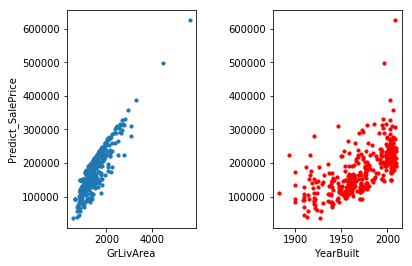

In [14]:
# subplotメソッドでグラフを１行２列の形で表示させる(１個目)
plt.subplot(121)
# 散布図の表示1(横軸→GrLivArea　縦軸→予測した不動産価格)
plt.scatter(X_test[:,0], predict,s=10)
# xlabelの設定
plt.xlabel('GrLivArea')
# ylabelの設定
plt.ylabel('Predict_SalePrice')

# subplotメソッドでグラフを１行２列の形で表示させる(１個目)
plt.subplot(122)
# 散布図の表示1(横軸→YearBuilt　縦軸→予測した不動産価格)
plt.scatter(X_test[:,1], predict, s=10, c='red')
# xlabelの設定
plt.xlabel('YearBuilt')

# グラフ間の横幅を0.6に変更(デフォルト値ではグラフ同士が重なるため)
plt.subplots_adjust(wspace=0.6)

# 【課題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト
公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.svm.SVR — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [15]:
type(X_train)

numpy.ndarray

In [16]:
X_train

array([[2372, 1892],
       [1472, 1991],
       [ 960, 1965],
       ...,
       [1902, 1978],
       [1557, 2003],
       [1839, 1998]], dtype=int64)

In [17]:
X_train = X_train.astype(float)

In [18]:
X_train

array([[2372., 1892.],
       [1472., 1991.],
       [ 960., 1965.],
       ...,
       [1902., 1978.],
       [1557., 2003.],
       [1839., 1998.]])

# パイプラインを構築

In [19]:
# SVRクラス　DecisionTreeRegressorクラス　RandomForestRegressorクラスをインポート
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

pipelines ={
    'lin': Pipeline([('scl',StandardScaler()),
                     ('est',LinearRegression())]),
    'svm': Pipeline([('scl',StandardScaler()),
                     ('est',SVR())]),
    'dec': Pipeline([('scl',StandardScaler()),
                     ('est',DecisionTreeRegressor())]),
    'ran': Pipeline([('scl',StandardScaler()),
                     ('est',RandomForestRegressor())])
}

## 学習・予測

In [20]:
# 評価値を格納する辞書型データscore
scores = {}

# 予測値を格納する辞書型データpredict
predict = {}

# pipelineの中のデータを順番に、pipe_name, pipeline に格納する
for pipe_name, pipeline in pipelines.items():
    
    # 学習
    pipeline.fit(X_train,y_train)
    
    #予測
    predict[pipe_name] = pipeline.predict(X_test)
    
    # 予測・評価し、評価結果をscoreに格納(比較しやすいようにint型に変換する)
    scores[(pipe_name,'mean_squared_error')] = int(mean_squared_error(y_test, predict[pipe_name]))

scores

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning

{('lin', 'mean_squared_error'): 2725908099,
 ('svm', 'mean_squared_error'): 6943346839,
 ('dec', 'mean_squared_error'): 2856934684,
 ('ran', 'mean_squared_error'): 1953105592}

In [21]:
# 辞書unstackメソッドで表形式にしてDataFrame型にして格納
df = pd.Series(scores).unstack()
df

,mean_squared_error
dec,2856934684
lin,2725908099
ran,1953105592
svm,6943346839


In [22]:
df = df.unstack()
df

mean_squared_error  dec    2856934684
                    lin    2725908099
                    ran    1953105592
                    svm    6943346839
dtype: int64

## 可視化(予測したSalePriceとGrLivAreaのグラフ)

Text(0.5, 0.98, 'Predict_SalePrice')

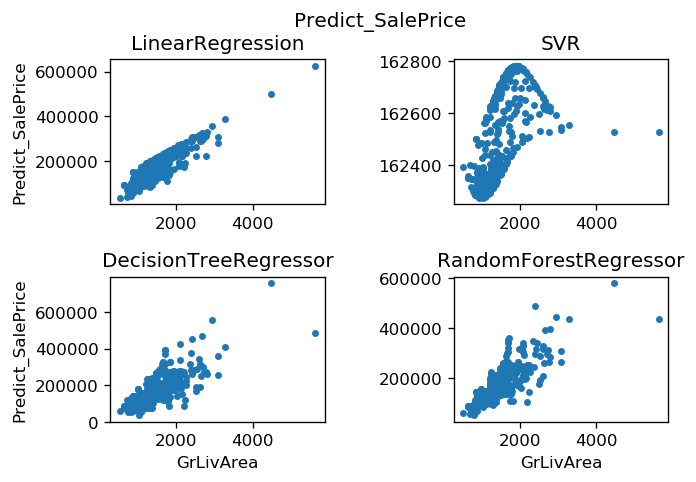

In [23]:
# figureオブジェクトを作成
fig = plt.figure(1,dpi=120)

# subplotメソッドでグラフを１行4列の形で表示させる(１個目)
ax1 = fig.add_subplot(221)
# 散布図の表示1(横軸→GrLivArea　縦軸→線形回帰モデルで予測した不動産価格)
ax1.scatter(X_test[:,0], predict['lin'],s=10)
# titleの設定
ax1.set_title('LinearRegression')
# ylabelの設定
ax1.set_ylabel('Predict_SalePrice')

# subplotメソッドでグラフを1行4列の形で表示させる(2個目)
ax2 = fig.add_subplot(222)
# 散布図の表示1(横軸→GrLivArea　縦軸→線形回帰モデルで予測した不動産価格)
ax2.scatter(X_test[:,0], predict['svm'],s=10)
# titleの設定
ax2.set_title('SVR')

# subplotメソッドでグラフを1行4列の形で表示させる(3個目)
ax3 = fig.add_subplot(223)
# 散布図の表示1(横軸→GrLivArea　縦軸→線形回帰モデルで予測した不動産価格)
ax3.scatter(X_test[:,0], predict['dec'],s=10)
# titleの設定
ax3.set_title('DecisionTreeRegressor')
# xlabelの設定
ax3.set_xlabel('GrLivArea')
# ylabelの設定
ax3.set_ylabel('Predict_SalePrice')

# subplotメソッドでグラフを1行4列の形で表示させる(4個目)
ax4 = fig.add_subplot(224)
# 散布図の表示1(横軸→GrLivArea　縦軸→線形回帰モデルで予測した不動産価格)
ax4.scatter(X_test[:,0], predict['ran'],s=10)
# titleの設定
ax4.set_title('RandomForestRegressor')
# xlabelの設定
ax4.set_xlabel('GrLivArea')

# グラフ間の横幅を0.6に変更(デフォルト値ではグラフ同士が重なるため)
fig.subplots_adjust(wspace=0.6, hspace=0.5)

# グラフのタイトルを表示
plt.suptitle('Predict_SalePrice')

## 可視化(予測したSalePriceとYearBuiltのグラフ)

Text(0.5, 0.98, 'Predict_SalePrice')

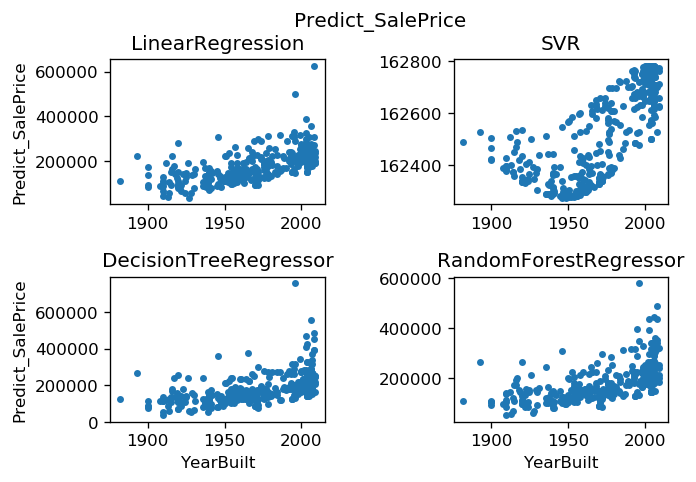

In [24]:
# figureオブジェクトを作成
fig = plt.figure(1,dpi=120)

# subplotメソッドでグラフを１行4列の形で表示させる(１個目)
ax1 = fig.add_subplot(221)
# 散布図の表示1(横軸→YearBuilt　縦軸→線形回帰モデルで予測した不動産価格)
ax1.scatter(X_test[:,1], predict['lin'],s=10)
# titleの設定
ax1.set_title('LinearRegression')
# ylabelの設定
ax1.set_ylabel('Predict_SalePrice')

# subplotメソッドでグラフを1行4列の形で表示させる(2個目)
ax2 = fig.add_subplot(222)
# 散布図の表示1(横軸→YearBuilt　縦軸→線形回帰モデルで予測した不動産価格)
ax2.scatter(X_test[:,1], predict['svm'],s=10)
# titleの設定
ax2.set_title('SVR')

# subplotメソッドでグラフを1行4列の形で表示させる(3個目)
ax3 = fig.add_subplot(223)
# 散布図の表示1(横軸→YearBuilt　縦軸→線形回帰モデルで予測した不動産価格)
ax3.scatter(X_test[:,1], predict['dec'],s=10)
# titleの設定
ax3.set_title('DecisionTreeRegressor')
# xlabelの設定
ax3.set_xlabel('YearBuilt')
# ylabelの設定
ax3.set_ylabel('Predict_SalePrice')

# subplotメソッドでグラフを1行4列の形で表示させる(4個目)
ax4 = fig.add_subplot(224)
# 散布図の表示1(横軸→YearBuilt　縦軸→線形回帰モデルで予測した不動産価格)
ax4.scatter(X_test[:,1], predict['ran'],s=10)
# titleの設定
ax4.set_title('RandomForestRegressor')
# xlabelの設定
ax4.set_xlabel('YearBuilt')

# グラフ間の横幅を0.6に変更(デフォルト値ではグラフ同士が重なるため)
fig.subplots_adjust(wspace=0.6, hspace=0.5)

# グラフのタイトルを表示
plt.suptitle('Predict_SalePrice')

## 考察
1. どのモデルが正確に分類できていたか？
    - 評価結果より決定木モデルが評価指標mean_squared_errorにおいて最もよい精度(低い値)で分類できていることを確認
    
    
2. 散布図にて確認できたことは？
    - 予測値とGrLivAreaのグラフについて
        - 線形回帰モデル、決定木モデル、ランダムフォレストモデルの3つは、散布図の形より正の相関があるように見える。
    - 予測値とYearBuiltのグラフについて
        - 線形回帰モデル、決定木モデル、ランダムフォレストモデルの3つは、散布図の形が近似しているが、SVMモデルはことなる形をしている。